# Capstone Project — The Battle of Neighbourhoods

### Introduction

Pune city is considered to be the cultural capital of Maharashtra in India. Tt is also known as the "Oxford of the East" due to the presence of several well-known educational institutions. Also, Restaurants from all over the world can be found here in Pune. Pune is home to numerous long-standing bakeries and regional restaurants, quiet and unassuming Pune loves its food. While the city's burgeoning dining scene now has both global restaurant chains, as well as trendy eateries, each of these age-old eating joints, have stood the test of time because of their unique local flavor and atmosphere.
There are many restaurants in Pune City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project ,I will list and visualise all major parts of Pune City with the kind of restaurants in those regions.

This project will help to understand the top rated and best restaurants in pune, also in its neighbourhood. I will try to show the localities which has maximum number of restaurants, top voted and top rated restaurants, also restaurants famous for chinese cuisine.


 ### Questions that can be asked using the above mentioned datasets
- What is best location in Pune City for Chinese Cuisine ? 
- Which areas have large number of Chinese Resturant Market ? 
- Which all areas have less number of resturant ? 
- Which is the top voted Restaurants and locality in Pune? 
- Which is the less voted Restaurants and locality in Pune? 
- Which is the best place to stay if I prefer Chinese Cuisine ? 
- Which places have best restaurant in Pune? 

### Data
For this project we need the following data :
<ul>
<li> Pune Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source :<a
                           href="https://www.kaggle.com/sagara9595/zomato-pune" >Zomato kaggel dataset</a>, The data source has been downloaded and uploaded to my git account from where i will be reading for my project needs. 
        <li> Description : <a href="https://raw.githubusercontent.com/codingmaniac2138/Coursera_Capstone/master/pune_zomato_restaurants.csv">This data set contains the required information</a>. And we will use this data set to explore various locality of new delhi city.
     </ul>
<li> Nearby places in each locality of pune city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the Pune city data from Pune Zomato kaggel dataset 
- Filter out all venues that are nearby by locality. 
- Using aggregative rating for each resturant to find the best places. 
- Using votes find top rated retaurants in the city. 
- Using FourSquare API we will find all venues for each neighborhood. 
- Visualize the Ranking of neighborhoods using folium library(python) 

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
! pip install geocoder
import geocoder

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


## Read the zomato resturant data from csv file

In [2]:
# Read the data set from the csv 
df_pune = pd.read_csv('https://raw.githubusercontent.com/codingmaniac2138/Coursera_Capstone/master/pune_zomato_restaurants.csv',encoding='ISO-8859-1')
df_pune.head()

res_id                             name    establishment  \
0     11283           Harajuku - The O Hotel  ['Fine Dining']   
1     10663              Mix@36 - The Westin       ['Lounge']   
2     10743              Kangan - The Westin  ['Fine Dining']   
3  18938162             Palette - The Westin  ['Fine Dining']   
4  18310167  Coriander Kitchen - Conrad Pune  ['Fine Dining']   

                                                 url  \
0  https://www.zomato.com/pune/harajuku-the-o-hot...   
1  https://www.zomato.com/pune/mix@36-the-westin-...   
2  https://www.zomato.com/pune/kangan-the-westin-...   
3  https://www.zomato.com/pune/palette-the-westin...   
4  https://www.zomato.com/pune/coriander-kitchen-...   

                                             address  city  city_id  \
0  The O Hotel, North Main Road, Koregaon Park, Pune  Pune        5   
1  The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...  Pune        5   
2  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
3  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
4     Conrad, Mangaldas Road, Bund Garden Road, Pune  Pune        5   

                        locality   latitude  longitude  ... price_range  \
0     The O Hotel, Koregaon Park  18.540239  73.887518  ...           4   
1            The Westin, Mundhwa  18.540040  73.905910  ...           4   
2            The Westin, Mundhwa  18.539455  73.906040  ...           4   
3            The Westin, Mundhwa  18.539430  73.906009  ...           4   
4  Conrad Pune, Bund Garden Road  18.535409  73.883592  ...           4   

   currency                                         highlights  \
0       Rs.  ['Cash', 'Debit Card', 'Lunch', 'Credit Card',...   
1       Rs.  ['Cash', 'Debit Card', 'Serves Alcohol', 'Take...   
2       Rs.  ['Serves Alcohol', 'Cash', 'Debit Card', 'Take...   
3       Rs.  ['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...   
4       Rs.  ['Lunch', 'Serves Alcohol', 'Takeaway Availabl...   

  aggregate_rating rating_text  votes  photo_count opentable_support delivery  \
0              3.7        Good     96           38               0.0       -1   
1              4.0   Very Good    682           78               0.0       -1   
2              4.0   Very Good    310          285               0.0       -1   
3              3.3     Average      9           31               0.0       -1   
4              4.4   Very Good    500         1116               0.0       -1   

   takeaway  
0        -1  
1        -1  
2        -1  
3        -1  
4        -1  

[5 rows x 26 columns]

In [3]:
# Rename needed columns 
df_pune = df_pune.rename(columns={'name':'Restaurant Name', 'locality':'Locality', 'longitude':'Longitude', 'latitude':'Latitude', 
                             'cuisines':'Cuisines','aggregate_rating':'Aggregate rating', 'rating_text':'Rating text', 'votes': 'Votes'})
df_pune.head()

res_id                  Restaurant Name    establishment  \
0     11283           Harajuku - The O Hotel  ['Fine Dining']   
1     10663              Mix@36 - The Westin       ['Lounge']   
2     10743              Kangan - The Westin  ['Fine Dining']   
3  18938162             Palette - The Westin  ['Fine Dining']   
4  18310167  Coriander Kitchen - Conrad Pune  ['Fine Dining']   

                                                 url  \
0  https://www.zomato.com/pune/harajuku-the-o-hot...   
1  https://www.zomato.com/pune/mix@36-the-westin-...   
2  https://www.zomato.com/pune/kangan-the-westin-...   
3  https://www.zomato.com/pune/palette-the-westin...   
4  https://www.zomato.com/pune/coriander-kitchen-...   

                                             address  city  city_id  \
0  The O Hotel, North Main Road, Koregaon Park, Pune  Pune        5   
1  The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...  Pune        5   
2  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
3  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
4     Conrad, Mangaldas Road, Bund Garden Road, Pune  Pune        5   

                        Locality   Latitude  Longitude  ... price_range  \
0     The O Hotel, Koregaon Park  18.540239  73.887518  ...           4   
1            The Westin, Mundhwa  18.540040  73.905910  ...           4   
2            The Westin, Mundhwa  18.539455  73.906040  ...           4   
3            The Westin, Mundhwa  18.539430  73.906009  ...           4   
4  Conrad Pune, Bund Garden Road  18.535409  73.883592  ...           4   

   currency                                         highlights  \
0       Rs.  ['Cash', 'Debit Card', 'Lunch', 'Credit Card',...   
1       Rs.  ['Cash', 'Debit Card', 'Serves Alcohol', 'Take...   
2       Rs.  ['Serves Alcohol', 'Cash', 'Debit Card', 'Take...   
3       Rs.  ['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...   
4       Rs.  ['Lunch', 'Serves Alcohol', 'Takeaway Availabl...   

  Aggregate rating Rating text  Votes  photo_count opentable_support delivery  \
0              3.7        Good     96           38               0.0       -1   
1              4.0   Very Good    682           78               0.0       -1   
2              4.0   Very Good    310          285               0.0       -1   
3              3.3     Average      9           31               0.0       -1   
4              4.4   Very Good    500         1116               0.0       -1   

   takeaway  
0        -1  
1        -1  
2        -1  
3        -1  
4        -1  

[5 rows x 26 columns]

## Data Cleaning
#### Remove the unwanted columns and rows from dataset

In [4]:
df_resp= df_pune[df_pune.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_resp = df_resp[df_resp['Aggregate rating'] !=0.0]

In [6]:
df_resp

Restaurant Name                       Locality  \
0                      Harajuku - The O Hotel     The O Hotel, Koregaon Park   
1                         Mix@36 - The Westin            The Westin, Mundhwa   
2                         Kangan - The Westin            The Westin, Mundhwa   
3                        Palette - The Westin            The Westin, Mundhwa   
4             Coriander Kitchen - Conrad Pune  Conrad Pune, Bund Garden Road   
...                                       ...                            ...   
4212  Lonavla Restaurant & Bar- Hotel Lonavla                       Lonavala   
4213                                   Utopia                       Lonavala   
4214                             Mapro Garden                       Lonavala   
4215                         Hotel Chandralok                       Lonavala   
4216                            Lion's Dhaaba                       Lonavala   

      Longitude   Latitude                                           Cuisines  \
0     73.887518  18.540239                                    Japanese, Sushi   
1     73.905910  18.540040      Finger Food, Asian, Continental, North Indian   
2     73.906040  18.539455                              Mughlai, North Indian   
3     73.906009  18.539430                                 Asian, Continental   
4     73.883592  18.535409                 North Indian, Asian, Mediterranean   
...         ...        ...                                                ...   
4212  73.405682  18.754747  North Indian, Chinese, Mughlai, Biryani, Desserts   
4213  73.402737  18.754342                       Mughlai, North Indian, Asian   
4214  73.419775  18.760234               Desserts, Fast Food, Pizza, Sandwich   
4215  73.405655  18.753223                                           Gujarati   
4216  73.393627  18.687172                              North Indian, Chinese   

      Aggregate rating Rating text  Votes  
0                  3.7        Good     96  
1                  4.0   Very Good    682  
2                  4.0   Very Good    310  
3                  3.3     Average      9  
4                  4.4   Very Good    500  
...                ...         ...    ...  
4212               4.3   Very Good    474  
4213               3.9        Good    336  
4214               4.3   Very Good    143  
4215               4.3   Very Good    317  
4216               3.9        Good     67  

[4087 rows x 8 columns]

### Map to show the restaurant cluters in Pune and Neigborhood 

In [7]:
# using folium and K-Means algo display the clusters in pune
pune_resto = folium.Map(location=[18.5204, 73.8567], zoom_start=10)

X = df_resp['Latitude']
Y = df_resp['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_resp ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_resp['Latitude'], df_resp['Longitude'], df_resp['Locality'], df_resp['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(pune_resto)  

pune_resto

In [8]:
df_resp.head(50)


Restaurant Name  \
0                              Harajuku - The O Hotel   
1                                 Mix@36 - The Westin   
2                                 Kangan - The Westin   
3                                Palette - The Westin   
4                     Coriander Kitchen - Conrad Pune   
5                               Baan Tao - Hyatt Pune   
6                        Alto Vino - JW Marriott Pune   
7                              Feast - Sheraton Grand   
8                    The House Of Medici - The Westin   
9                                  Koji - Conrad Pune   
10                                Zeera - Conrad Pune   
11                               Kabana - Conrad Pune   
12                                 Masu - Conrad Pune   
13                               Kitsch - The O Hotel   
14  Connexions Lounge & Bar - Holiday Inn Pune Hin...   
15                      Roof Top Bar - Sheraton Grand   
16                  Oak Lounge - Marriott Suites Pune   
17                   The CafÃÂ¨ - Hyatt Regency Pune   
18                          Eighty Eight - Hyatt Pune   
19                                Easy - Blue Diamond   
20                          Paasha - JW Marriott Pune   
21   MoMo Cafe - Courtyard By Marriott Pune Hinjawadi   
22                                     Hard Rock Cafe   
23                         Mi-a-Mi - JW Marriott Pune   
24                       Shakahari - JW Marriott Pune   
25                                        TGI Fridays   
26                                Addah - The O Hotel   
27  Evviva Sky Lounge - Crowne Plaza Pune City Centre   
28                                            Euriska   
29                                        TGI Fridays   
30                          Chingari - Sheraton Grand   
31                                        Royal China   
32                   Whispering Bamboo - Blue Diamond   
33             Mosaic - Crowne Plaza Pune City Centre   
34                       Mystic Masala - Blue Diamond   
35                             Vandaag - Vivanta Pune   
36                         Bar 101 - JW Marriott Pune   
37                      Entresol Bar - Sheraton Grand   
38               Skye Lounge Bar - Radisson Blu Hotel   
39              Coffee to Cocktails Bar - Hyatt Place   
42                                  Effingut Brewerkz   
44                    Boteco - Restaurante Brasileiro   
45                                      1BHK Superbar   
46                   Spice Kitchen - JW Marriott Pune   
47                                          Penthouze   
48                                          1000 Oaks   
49                                         Cuba Libre   
50                                             UNWIND   
51       The Great Kabab Factory - Radisson Blu Hotel   
52                                   Fuzion - Novotel   

                                           Locality  Longitude   Latitude  \
0                        The O Hotel, Koregaon Park  73.887518  18.540239   
1                               The Westin, Mundhwa  73.905910  18.540040   
2                               The Westin, Mundhwa  73.906040  18.539455   
3                               The Westin, Mundhwa  73.906009  18.539430   
4                     Conrad Pune, Bund Garden Road  73.883592  18.535409   
5                            Hyatt Pune, Nagar Road  73.904614  18.553966   
6             JW Marriott Pune, Senapati Bapat Road  73.829701  18.531761   
7                  Sheraton Grand, Bund Garden Road  73.871543  18.529916   
8                               The Westin, Mundhwa  73.906009  18.539430   
9                     Conrad Pune, Bund Garden Road  73.883558  18.535486   
10                    Conrad Pune, Bund Garden Road  73.883424  18.535507   
11                    Conrad Pune, Bund Garden Road  73.883151  18.535578   
12                    Conrad Pune, Bund Garden Road  73.883330  18.535554   
13                       The O Hotel, Koregaon Park 

## Which places have heighest rated restaurants in Pune?

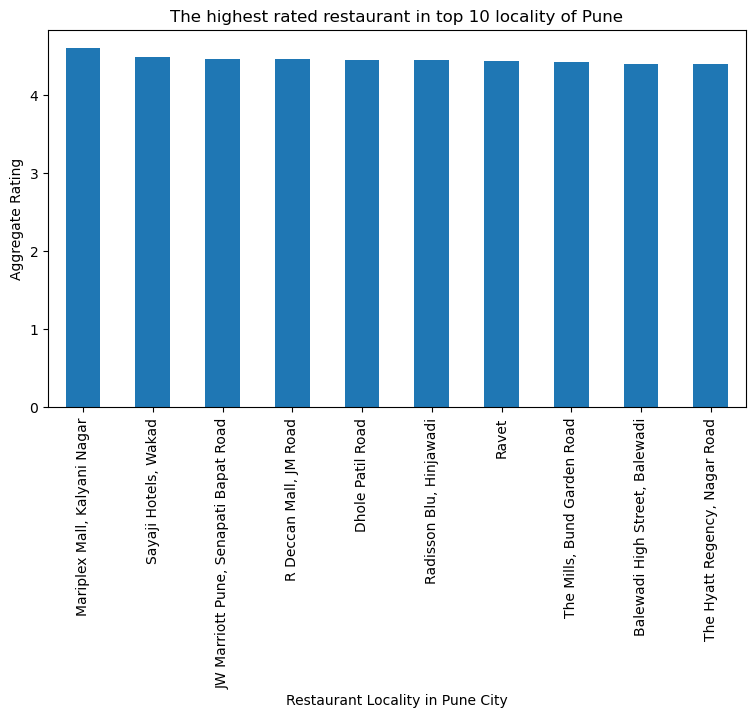

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('The highest rated restaurant in top 10 locality of Pune')

# giving a bar plot
df_resp.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune City')

# On y-axis
plt.ylabel('Aggregate Rating')

# displays the plot
plt.show()


The best restarants are available in <b>Kesbah, Greater Kailash area.</b>

## Which places have lowest rated restaurants in Pune?

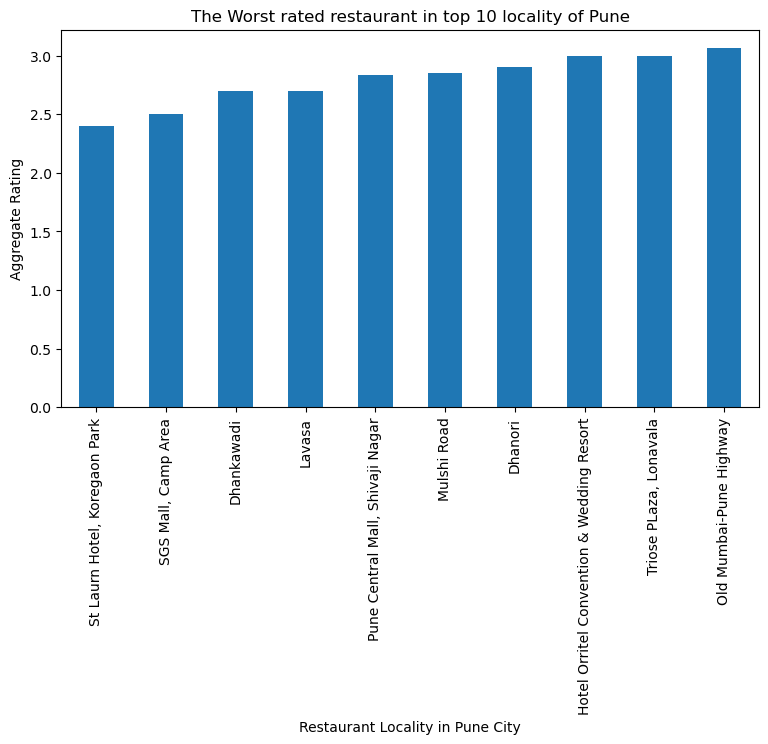

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated restaurant in top 10 locality of Pune')

#giving a bar plot
df_resp.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune City')

# On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restaurants are available in <b>St Laun Koregaon Park.</b>

## Which place has more number of restairants to choose from?

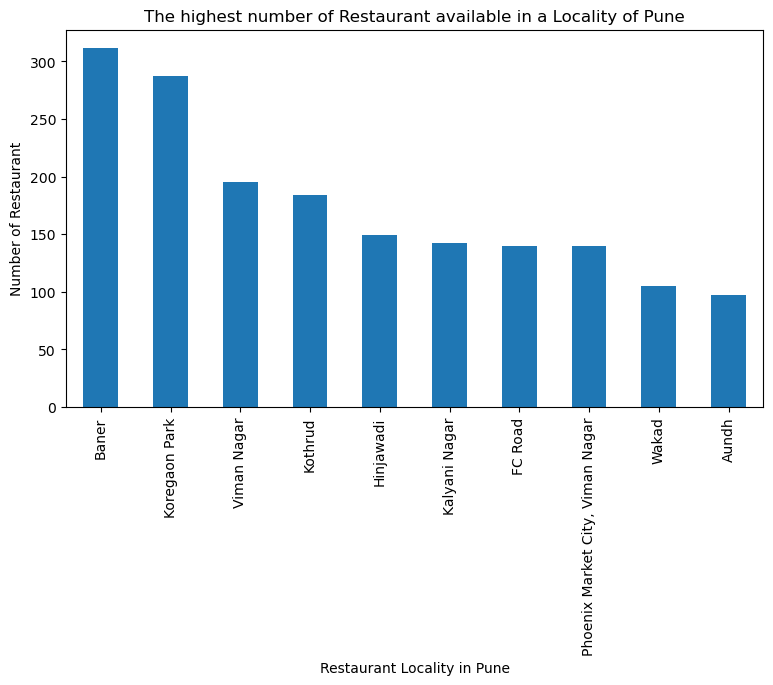

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('The highest number of Restaurant available in a Locality of Pune')

# giving a bar plot
df_resp.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune')

# On y-axis
plt.ylabel('Number of Restaurant')

# displays the plot
plt.show()

<b>Baner</b> is the best places for a person who have lot of restaurants to choose from.

## Which place has less number of Restaurants to choose from in Pune city?

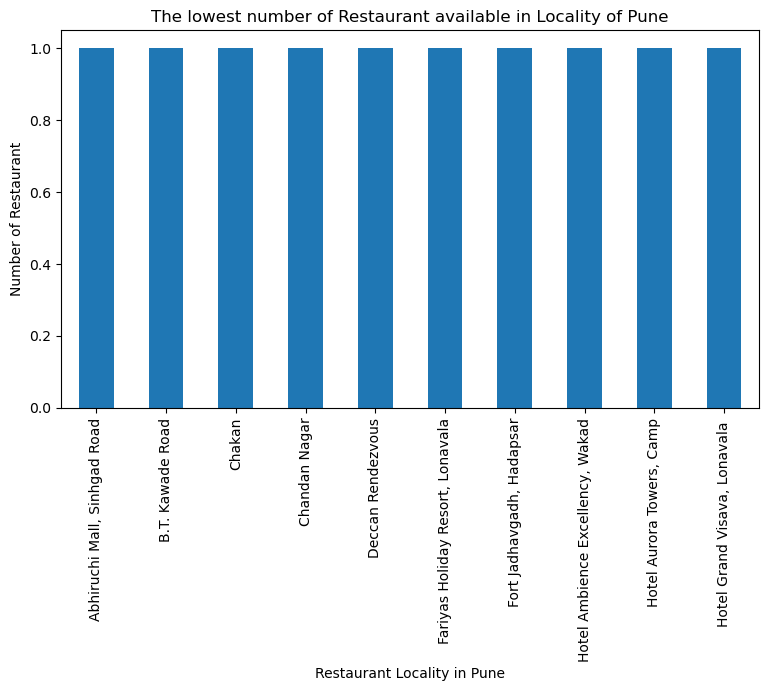

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Pune')
#On x-axis

#giving a bar plot
df_resp.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Restaurant Locality in Pune')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for chinese restaurant in Pune city?

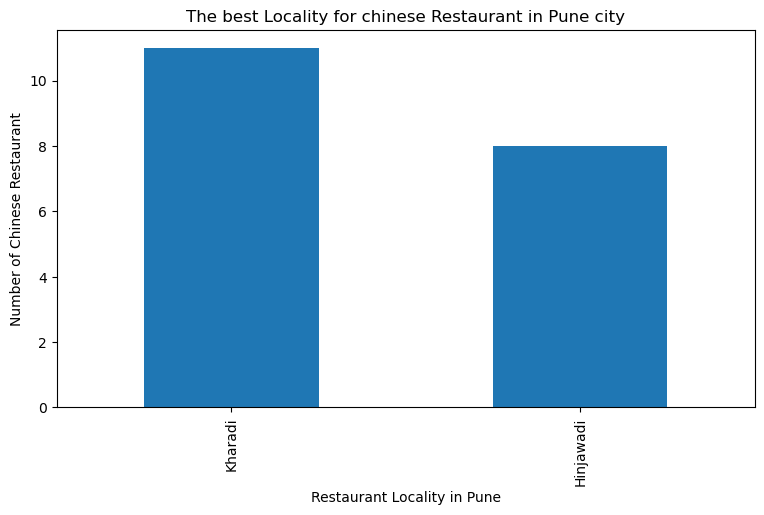

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese Restaurant in Pune city')

#giving a bar plot
# df_Res
df_resp[df_resp['Cuisines'].str.startswith('Chinese')]
df_resp[df_resp['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(2).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune')

# On y-axis
plt.ylabel('Number of Chinese Restaurant')

# displays the plot
plt.show()

<b>Kharadi</b> is the best place for Chinese restaurant.

## which are the best chinese resturants in Pune?  

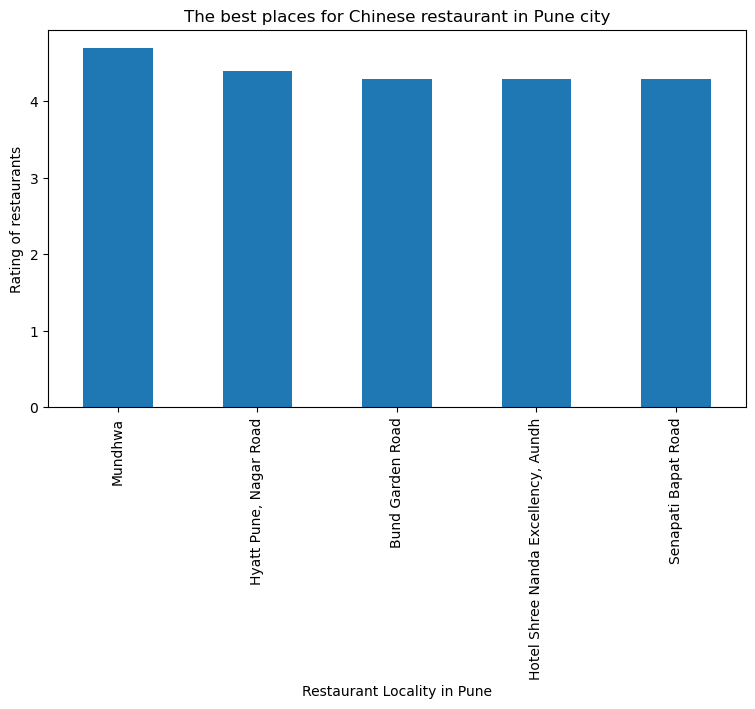

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in Pune city')

# giving a bar plot
df_resp[df_resp['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune')

# On y-axis
plt.ylabel('Rating of restaurants')

# displays the plot
plt.show()

Mundwa has the best chinese retaurants in pune

### Which area has more top voted restaurants in pune?

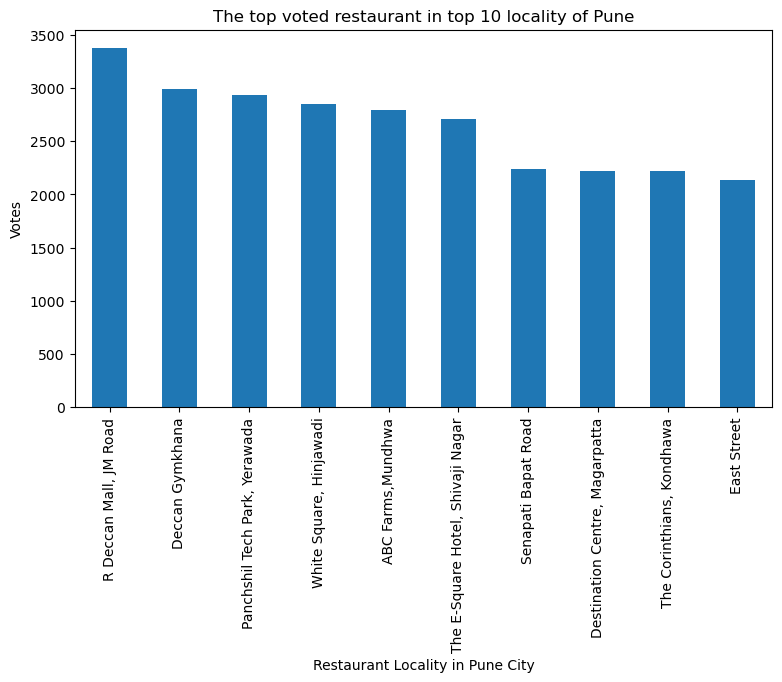

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The top voted restaurant in top 10 locality of Pune')

#giving a bar plot
df_resp.groupby('Locality')['Votes'].mean().nlargest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune City')

# On y-axis
plt.ylabel('Votes')

#displays the plot
plt.show()

<b> JM Road</b> has most votes restaurants in pune.

### Which area has less voted restaurants in pune?

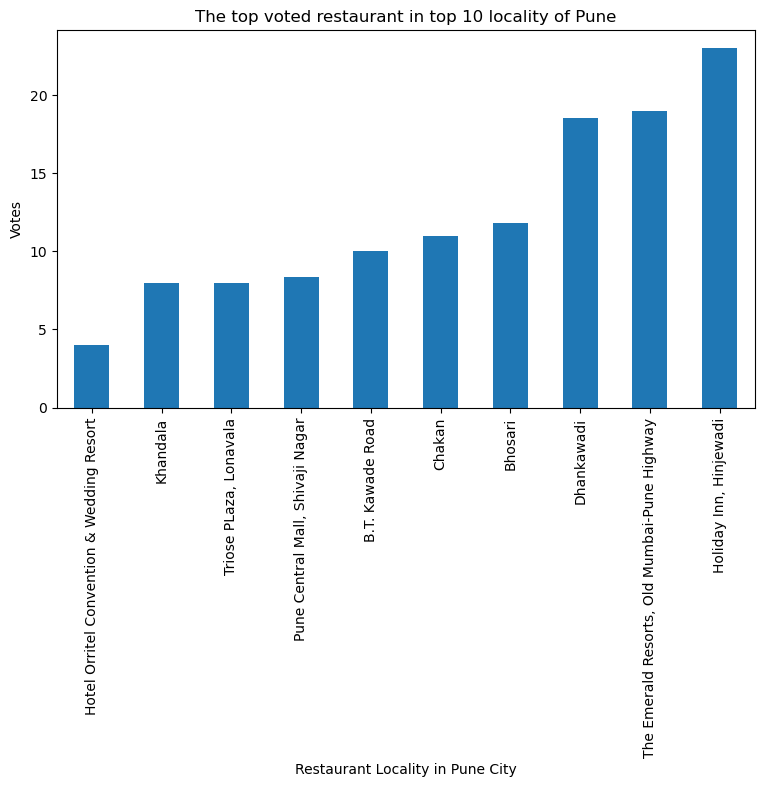

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The top voted restaurant in top 10 locality of Pune')

#giving a bar plot
df_resp.groupby('Locality')['Votes'].mean().nsmallest(10).plot(kind='bar')

# On x-axis
plt.xlabel('Restaurant Locality in Pune City')

# On y-axis
plt.ylabel('Votes')

#displays the plot
plt.show()

### Data transformation
Based on Locality grouping the data

In [17]:
df_Res_Loc =  df_resp.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_resp.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_resp.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_resp.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_resp.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_resp.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_resp.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [18]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0             ABC Farms,Mundhwa  18.539101  73.904827                 6   
1  Abhiruchi Mall, Sinhgad Road  18.463905  73.832473                 1   
2        Aditi Mall, Baner Road  18.558200  73.792624                 4   
3   Aditya Shagun Mall, Bavdhan  18.519293  73.778530                 7   
4                        Akurdi  18.647840  73.769679                16   

                                             Cusines  Agg_Rating  \
0  Iranian, North Indian, Continental, Iranian, N...    4.200000   
1       North Indian, South Indian, Chinese, Biryani    3.300000   
2  Bakery, Desserts, Mughlai, Biryani, North Indi...    3.950000   
3  Chinese, Thai, Malaysian, Indonesian, Asian, N...    3.957143   
4  Chinese, North Indian, Mughlai, Cafe, North In...    3.650000   

                   Comments  No_of_Votes  
0                 Very Good        16740  
1                   Average           38  
2           Good, Very Good         3934  
3      Very Good, Good, Bom         7101  
4  Average, Very Good, Good         3272

In [19]:
df_final.shape

(165, 8)

## Define Foursquare Credentials and Version

In [20]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


## Create a function to repeat the same process to all the Locality in Pune

In [21]:
## create a function to repeat the same process to all the Locality in Pune

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [22]:
# find the venues in all Pune Locality
pune_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ABC Farms,Mundhwa
Abhiruchi Mall, Sinhgad Road
Aditi Mall, Baner Road
Aditya Shagun Mall, Bavdhan
Akurdi
Amanora Town Centre, Hadapsar
Ambrosia Resort and Spa
Aundh
B.T. Kawade Road
Balewadi
Balewadi High Street, Balewadi
Baner
Bavdhan
Bhosale-Shinde Arcade, JM Road
Bhosari
Bhugaon
Bibvewadi
Blue Diamond, Koregaon Park
Budhwar Peth
Bund Garden Road
Camp Area
Chakan
Chandan Nagar
Chinchwad
Citrus Hotel, Pimpri
City Hub @ WTC, Kharadi
CityONE Mall
Club 29, Wakad
Conrad Pune, Bund Garden Road
Courtyard By Marriott, Hinjewadi
Creaticity Mall, Yerawada
Crowne Plaza Pune City Centre, Bund Garden Road
Dange Chowk
Deccan Gymkhana
Deccan Rendezvous
Dehu Road
Della Adventure Resort
Destination Centre, Magarpatta


KeyError: 'groups'

In [ ]:
pune_venues.head()

In [ ]:
pune_venues.groupby('Locality').count()

In [ ]:
print('There are {} uniques categories.'.format(len(pune_venues['Venue Category'].unique())))

In [ ]:
## Analyze Each Locality

# one hot encoding
pune_onehot = pd.get_dummies(pune_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
pune_onehot['Locality'] = pune_venues['Locality'] 

# move Locality column to the first column
column_list = pune_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
pune_onehot = pune_onehot[column_list]

pune_onehot.head(20)

In [ ]:
pune_grouped = pune_onehot.groupby('Locality').mean().reset_index()
pune_grouped

In [ ]:
pune_grouped.shape

In [ ]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in pune_grouped['Locality']:
    print("----"+hood+"----")
    temp = pune_grouped[pune_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = pune_grouped['Locality']

for ind in np.arange(pune_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pune_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

In [ ]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

pune_clustering = pune_grouped.drop('Locality', 1)
pune_clustering

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pune_clustering)

# check cluster labels generated for each row in the dataframe
kmeans
kmeans.labels_.shape
len(pune_merged)
len(kmeans.labels_)

In [ ]:
# add clustering labels
pune_merged = df_final.head(159)
pune_merged

pune_merged['Cluster Labels'] = kmeans.labels_
#merge pune_grouped with df_Chinese to add latitude/longitude for each Locality
pune_merged = pune_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

pune_merged.head()

In [ ]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pune_merged['Lat'], pune_merged['Lng'], pune_merged['Locality'], pune_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
## Examine Clusters

## Cluster 1
pune_merged.loc[pune_merged['Cluster Labels'] == 0, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

In [ ]:
## Examine Clusters

## Cluster 2
pune_merged.loc[pune_merged['Cluster Labels'] == 1, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

In [ ]:
## Examine Clusters

## Cluster 3
pune_merged.loc[pune_merged['Cluster Labels'] == 2, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

In [ ]:
## Examine Clusters

## Cluster 4
pune_merged.loc[pune_merged['Cluster Labels'] ==3 , pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

In [ ]:
## Examine Clusters

## Cluster 5
pune_merged.loc[pune_merged['Cluster Labels'] == 4, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

### Conclusion 
- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine. 
- Pancsheel park, Nehru place have the best Chinese Resturant. 
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    